<a href="https://colab.research.google.com/github/JMartinRutgers/API-Basic/blob/main/USA_Border_crossing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [176]:
import pandas as pd
import io
import requests

url="https://www.cbp.gov/sites/default/files/assets/documents/2022-Sep/sbo-encounters-fy19-fy22-aug_0.csv"
s=requests.get(url).content
c=pd.read_csv(io.StringIO(s.decode('utf-8')))

In [177]:
data= pd.DataFrame(c)

In [178]:
data

,Fiscal Year,Month Grouping,Month (abbv),Component,Demographic,Citizenship Grouping,Title of Authority,Encounter Type,Encounter Count
0,2019,FYTD,AUG,Office of Field Operations,Accompanied Minors,Guatemala,Title 8,Inadmissibles,0.0
1,2019,FYTD,DEC,U.S. Border Patrol,FMUA,Honduras,Title 8,Apprehensions,9584.0
2,2021,Remaining,SEP,Office of Field Operations,Single Adults,Other,Title 8,Inadmissibles,1108.0
3,2021,Remaining,SEP,Office of Field Operations,Single Adults,Guatemala,Title 8,Inadmissibles,14.0
4,2019,FYTD,JUN,Office of Field Operations,Single Adults,Honduras,Title 8,Inadmissibles,87.0
...,...,...,...,...,...,...,...,...,...
2213,2022 (FYTD),FYTD,OCT,U.S. Border Patrol,UC / Single Minors,El Salvador,Title 8,Apprehensions,1664.0
2214,2022 (FYTD),FYTD,OCT,U.S. Border Patrol,UC / Single Minors,Guatemala,Title 8,Apprehensions,5049.0
2215,2022 (FYTD),FYTD,OCT,U.S. Border Patrol,UC / Single Minors,Honduras,Title 8,Apprehensions,3140.0
2216,2022 (FYTD),FYTD,OCT,U.S. Border Patrol,UC / Single Minors,Mexico,Title 8,Apprehensions,2307.0


In [179]:
data[["Citizenship Grouping","Citizenship Grouping","Encounter Count"]].values

array([['Guatemala', 'Guatemala', 0.0],
       ['Honduras', 'Honduras', 9584.0],
       ['Other', 'Other', 1108.0],
       ...,
       ['Honduras', 'Honduras', 3140.0],
       ['Mexico', 'Mexico', 2307.0],
       ['Other', 'Other', 456.0]], dtype=object)

In [185]:
df = data.groupby("Citizenship Grouping").max()
df

,Fiscal Year,Month Grouping,Month (abbv),Component,Demographic,Title of Authority,Encounter Type,Encounter Count
Citizenship Grouping,,,,,,,,
El Salvador,2022 (FYTD),Remaining,SEP,U.S. Border Patrol,UC / Single Minors,Title 8,Inadmissibles,10912.0
Guatemala,2022 (FYTD),Remaining,SEP,U.S. Border Patrol,UC / Single Minors,Title 8,Inadmissibles,34164.0
Honduras,2022 (FYTD),Remaining,SEP,U.S. Border Patrol,UC / Single Minors,Title 8,Inadmissibles,33202.0
Mexico,2022 (FYTD),Remaining,SEP,U.S. Border Patrol,UC / Single Minors,Title 8,Inadmissibles,73243.0
Other,2022 (FYTD),Remaining,SEP,U.S. Border Patrol,UC / Single Minors,Title 8,Inadmissibles,59861.0


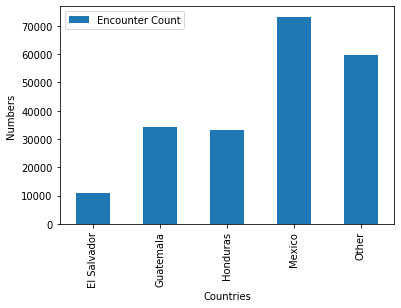

<Figure size 432x288 with 0 Axes>

In [187]:
# Create a bar chart based off of the group series from before
count_chart = df.plot(kind='bar')

# Set the xlabel and ylabel using class methods
count_chart.set_xlabel("Countries")
count_chart.set_ylabel("Numbers ")


plt.show()
plt.tight_layout()